In [143]:
import pandas as pd
import matplotlib.pyplot as plt



In [144]:
#Вывести: кол-во наблюдений в датасете
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
data = pd.read_table(url, sep='\t')
print(data.shape[0])

4622


In [145]:
#Вывести названия столбцов
for i in data.columns:
    print(i)

order_id
quantity
item_name
choice_description
item_price


In [146]:
#Определить самую частую позицию (item) в заказе
freq_item = data['item_name']
print(freq_item.mode()[0])

Chicken Bowl


(array([ 914., 1050.,  922.,  550.,  526.,  130.,  401.,   84.,   25.,
          20.]),
 array([ 0. ,  4.9,  9.8, 14.7, 19.6, 24.5, 29.4, 34.3, 39.2, 44.1, 49. ]),
 <BarContainer object of 10 artists>)

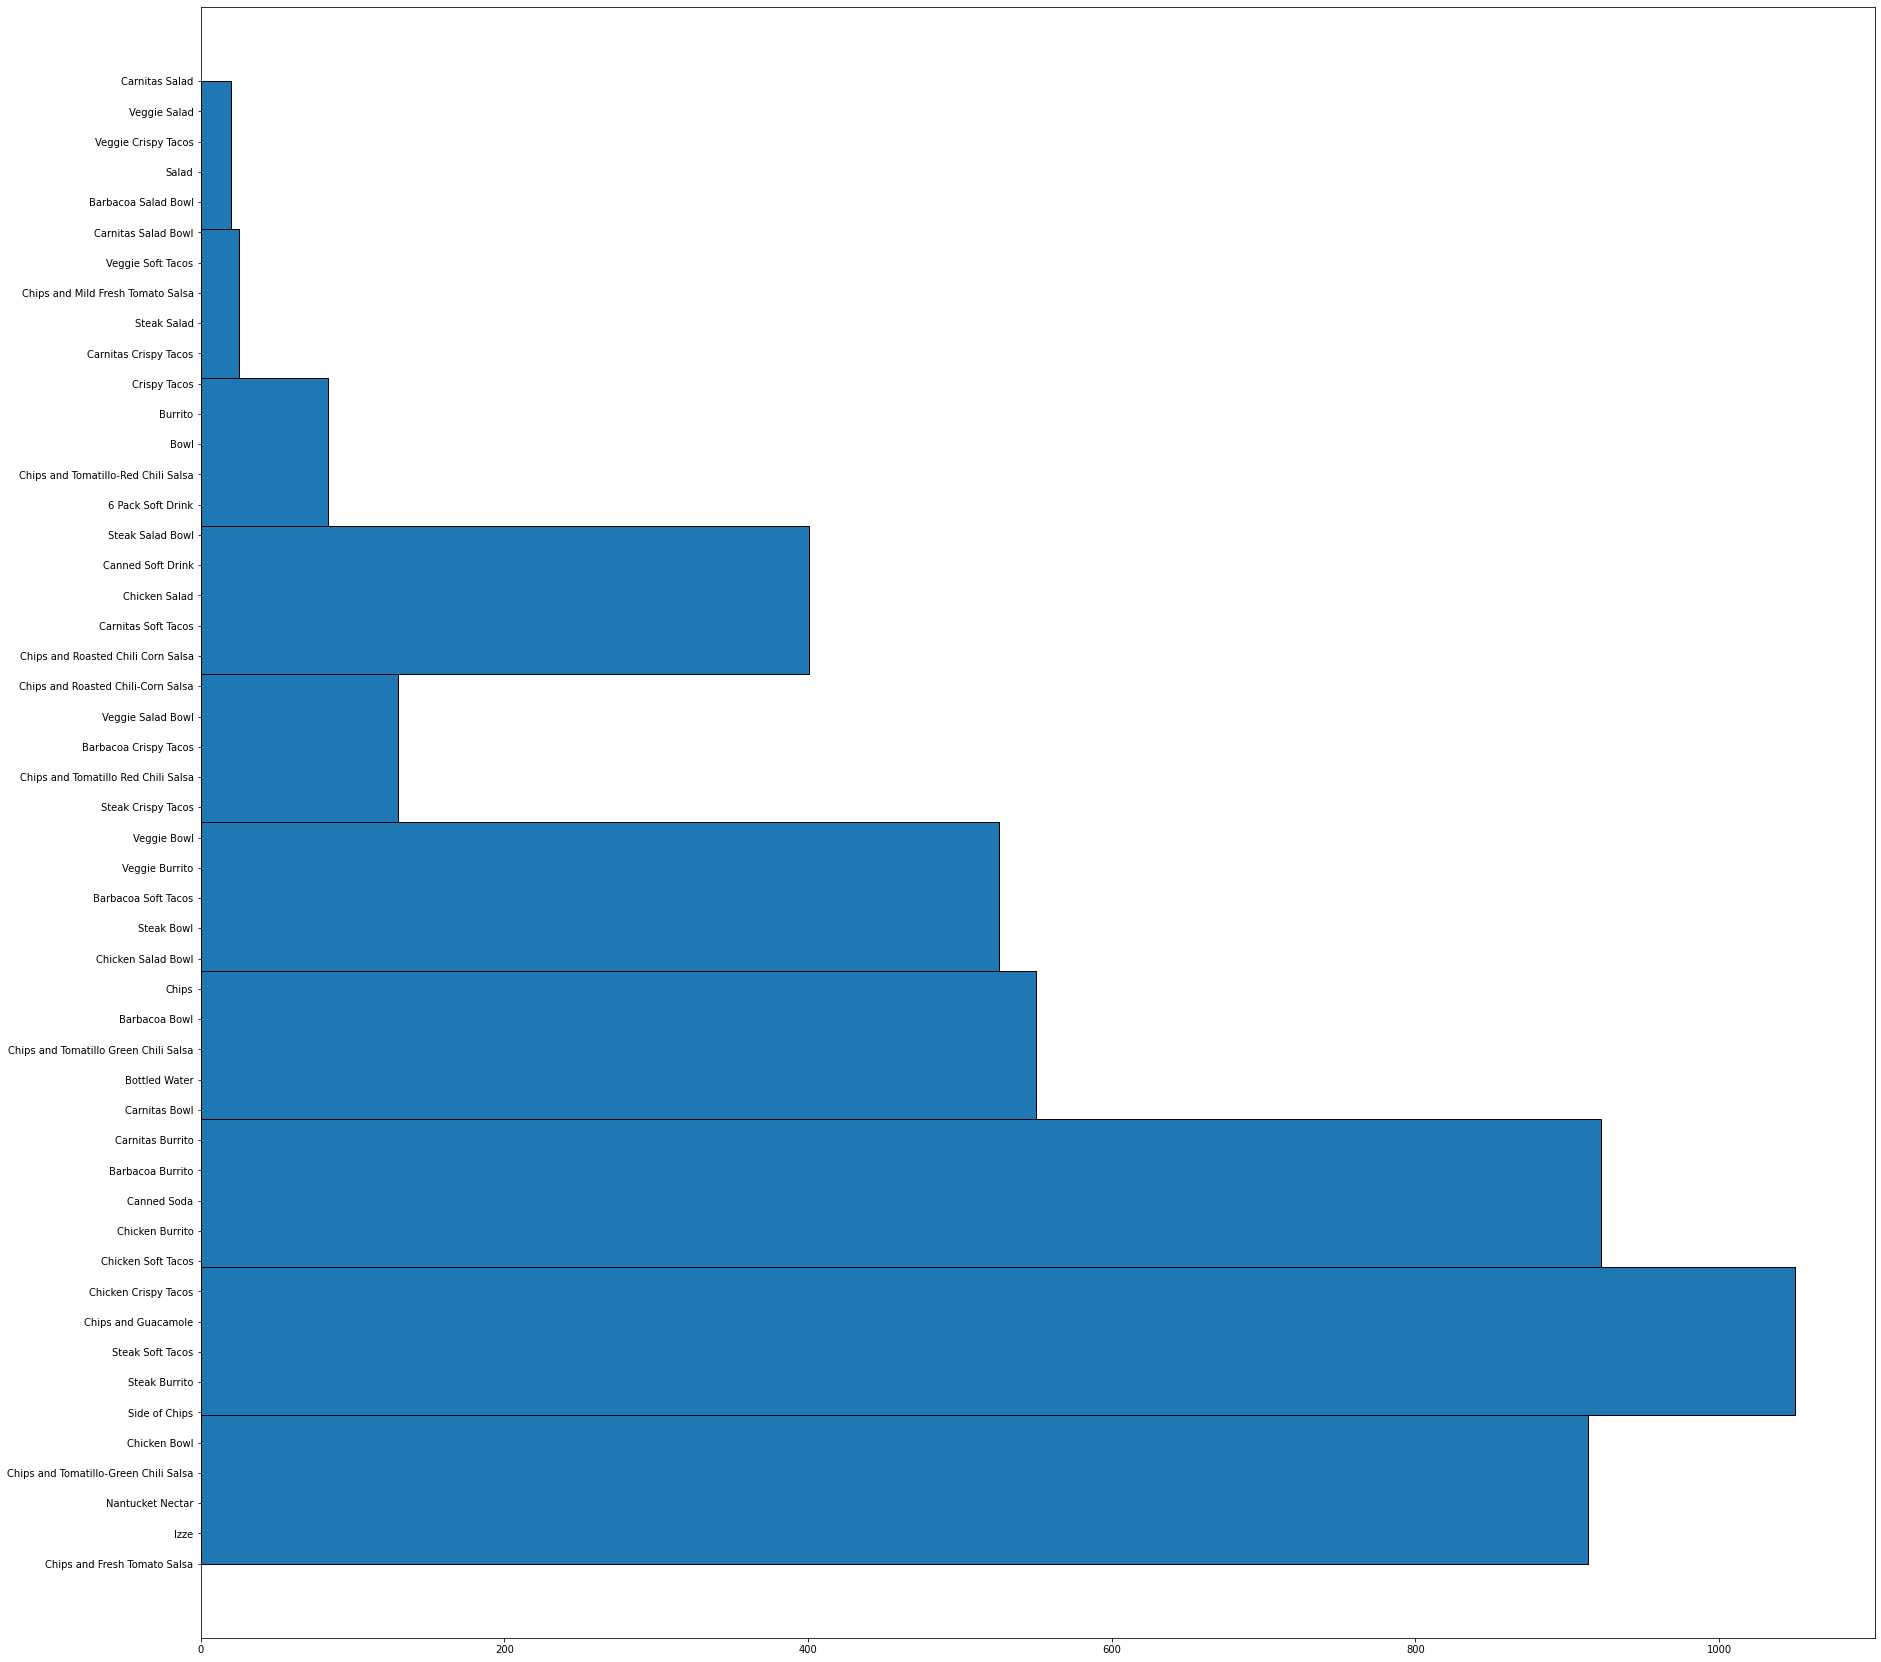

In [147]:
#Построить гистрограмму частоты заказов по позициям (item )
plt.figure(figsize=(30,30))
plt.hist(freq_item, orientation='horizontal', edgecolor = 'black', )


In [148]:
#Измените тип переменной item_price c с помощью лямбды функции
data['item_price'] = data['item_price'].apply(lambda x: float(x[1:]))
data.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


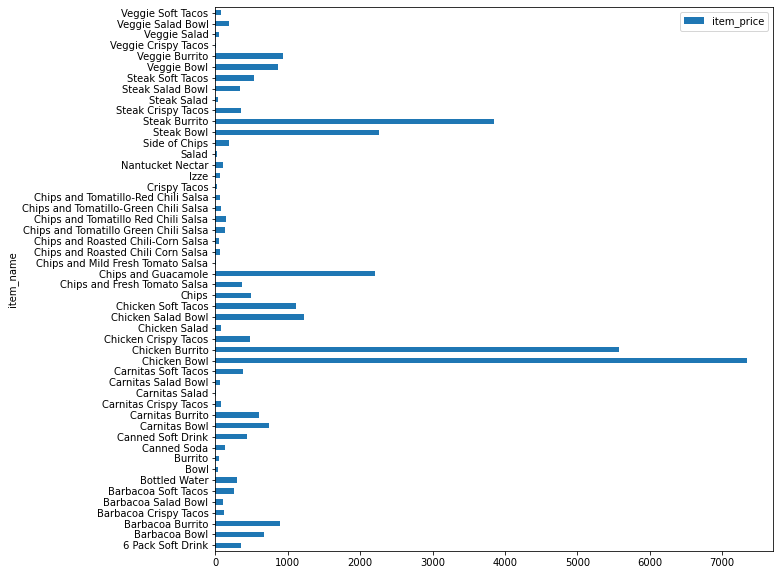

In [149]:
#Построить гистограмму кол-во денег заработанных по каждой позиции (item)
pd.concat([data['item_name'], data['item_price']], axis=1).groupby('item_name').sum().plot(kind='barh', figsize=(10,10))
plt.show()

In [150]:
#Средняя сумма заказа? (минимум 2 способа)
print(data['item_price'].sum() / data.groupby('order_id').ngroups)
print(data.groupby('order_id')['item_price'].sum().mean())


18.811428571428575
18.811428571428568


In [151]:
#Выведите среднее, минимальное и максимальное, медианное значения позиций в заказе
print(data['quantity'].mean())
print(data['quantity'].min())
print(data['quantity'].max())
print(data['quantity'].median())

1.0757247944612722
1
15
1.0


In [152]:
#Определить статистику заказов стейков, а также статистику заказов прожарки.
print("Среднее: ", data['quantity'].mean())
print("Минимальное: ", data['quantity'].min())
print("Максимальное: ", data['quantity'].max())
print("Медиана: ", data['quantity'].median())

Среднее:  1.0757247944612722
Минимальное:  1
Максимальное:  15
Медиана:  1.0


In [153]:
steaks = data['item_name'].str.contains('steak', case=False)
print("Среднее: ", (steaks * data['quantity']).mean())
print("Минимальное: ", (steaks * data['quantity']).min())
print("Максимальное: ", (steaks * data['quantity']).max())
print("Медиана: ", (steaks * data['quantity']).median())
print("Дисперсия: ", (steaks * data['quantity']).var())

medium = data['choice_description'].str.contains('medium', case=False)
mild = data['choice_description'].str.contains('mild', case=False)
hot = data['choice_description'].str.contains('hot', case=False)

print("Статистка по medium соусу:")
print("Среднее: ", medium.mean())
print("Медиана: ", medium.median())
print("Дисперсия: ", medium.var())

print("Статистка по mild соусу:")
print("Среднее: ", mild.mean())
print("Медиана: ", mild.median())
print("Дисперсия: ", mild.var())

print("Статистка по hot соусу:")
print("Среднее: ", hot.mean())
print("Медиана: ", hot.median())
print("Дисперсия: ", hot.var())



Среднее:  0.15880571181306793
Минимальное:  0
Максимальное:  3
Медиана:  0.0
Дисперсия:  0.14876360258152088
Статистка по medium соусу:
Среднее:  0.1066350710900474
Медиана:  0.0
Дисперсия:  0.09529225908372825
Статистка по mild соусу:
Среднее:  0.11315165876777251
Медиана:  0.0
Дисперсия:  0.10037809373354395
Статистка по hot соусу:
Среднее:  0.07760663507109004
Медиана:  0.0
Дисперсия:  0.07160505529225909


In [154]:
#Добавить новый столбец цен на каждую позицию в заказе в рублях.
exchange_rate = 75.73
data['item_price_ru'] = data['item_price'] * exchange_rate
data.head()

,order_id,quantity,item_name,choice_description,item_price,item_price_ru
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,180.9947
1,1,1,Izze,[Clementine],3.39,256.7247
2,1,1,Nantucket Nectar,[Apple],3.39,256.7247
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,180.9947
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,1285.8954


In [155]:
#Сгруппировать заказы по входящим позициям в него. Отдельно сгруппировать по стейкам во всех видах прожарках.
data.groupby('item_name').agg({'order_id': lambda x : list(x), 'quantity': 'count'}).rename(columns={'order_id':'order_ids','quantity':'order_num'})

,order_ids,order_num
item_name,,
6 Pack Soft Drink,"[129, 148, 154, 168, 182, 230, 264, 298, 306, ...",54
Barbacoa Bowl,"[19, 27, 42, 51, 56, 61, 97, 110, 182, 202, 24...",66
Barbacoa Burrito,"[11, 36, 53, 57, 65, 98, 108, 146, 163, 167, 1...",91
Barbacoa Crispy Tacos,"[75, 110, 186, 205, 315, 343, 419, 756, 768, 1...",11
Barbacoa Salad Bowl,"[501, 541, 576, 576, 738, 970, 1283, 1346, 142...",10
Barbacoa Soft Tacos,"[26, 82, 117, 252, 353, 406, 467, 475, 506, 54...",25
Bottled Water,"[17, 38, 138, 143, 163, 203, 225, 244, 270, 28...",162
Bowl,"[193, 279]",2
Burrito,"[214, 214, 217, 279, 313, 313]",6


In [156]:
data[data.item_name.str.contains("Steak") & data.choice_description.str.contains("Mild", na=False)].groupby('item_name').agg({'order_id': lambda x : list(x.astype(int)),'quantity': 'count'})

,order_id,quantity
item_name,,
Steak Bowl,"[25, 84, 276, 311, 341, 382, 391, 433, 474, 50...",30
Steak Burrito,"[16, 22, 80, 140, 152, 155, 156, 194, 218, 229...",66
Steak Crispy Tacos,"[301, 589, 1225]",3
Steak Salad,[369],1
Steak Soft Tacos,"[694, 1239, 1282, 1451, 1552]",5


In [157]:
data[data.item_name.str.contains("Steak") & data.choice_description.str.contains("Medium", na=False)].groupby('item_name').agg({'order_id': lambda x : list(x.astype(int)),'quantity': 'count'})

,order_id,quantity
item_name,,
Steak Bowl,"[45, 113, 133, 186, 245, 276, 311, 377, 391, 4...",30
Steak Burrito,"[16, 22, 23, 31, 45, 47, 55, 66, 85, 87, 100, ...",71
Steak Crispy Tacos,"[190, 319, 542]",3
Steak Soft Tacos,"[52, 78, 558, 799, 1128, 1239, 1396, 1451, 155...",10


In [158]:
data[data.item_name.str.contains("Steak") & data.choice_description.str.contains("Hot", na=False)].groupby('item_name').agg({'order_id': lambda x : list(x.astype(int)),'quantity': 'count'})

,order_id,quantity
item_name,,
Steak Bowl,"[38, 112, 180, 186, 219, 245, 444, 484, 797, 8...",21
Steak Burrito,"[21, 22, 29, 30, 32, 67, 112, 187, 213, 371, 3...",47
Steak Crispy Tacos,"[419, 959, 1142, 1178]",4
Steak Salad,"[276, 311]",2
Steak Soft Tacos,"[29, 52, 122, 130, 395, 694, 861, 1552]",8


In [159]:
#Определить цену по каждой позиции в отдельности.
data['one_item_price'] = round(data['item_price'] / data['quantity'], 2)

not_atom_items = data.item_name.str.contains('and') 
chips_price = data.loc[data.item_name == 'Chips', 'item_price'].values[0]
data.loc[not_atom_items, 'item_name'] = data.loc[not_atom_items, 'item_name'].apply(lambda row: row[10:])
data.loc[not_atom_items, 'one_item_price'] = round(data['one_item_price'] - chips_price, 2)
    
data.groupby('item_name').agg({'one_item_price':lambda x: x.unique()})

,one_item_price
item_name,
6 Pack Soft Drink,6.49
Barbacoa Bowl,"[11.75, 9.25, 8.99, 11.48, 8.69, 11.49]"
Barbacoa Burrito,"[8.99, 9.25, 11.75, 11.08, 8.69, 11.48]"
Barbacoa Crispy Tacos,"[11.75, 9.25, 11.48, 8.99]"
Barbacoa Salad Bowl,"[11.89, 9.39]"
Barbacoa Soft Tacos,"[9.25, 8.99, 11.75, 11.48]"
Bottled Water,"[1.09, 1.5]"
Bowl,7.4
Burrito,7.4
